<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Principal Component Analysis with scikit-learn in Python -- Project Overview

Let's use the the famous IRIS data set for this project. The iris data have only 4 features and may not be an ideal dataset for PCA. However, our goal is to apply and practice the skills that we have learned in the previous section. 

**Let's import some important libraries and load the dataset first!**

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

**Let's load the iris dataset**

In [67]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['target_names', 'feature_names', 'data', 'target', 'DESCR'])

**Create the dataframe and output the head of the data, use features_names as columns**

In [68]:
#Code here please
df = pd.DataFrame(data = iris['data'], columns=iris['feature_names'])

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**import `StandardScaler` and create its instance.** 

In [69]:
#Code here please
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

**Fit the scaler to the features in your data.**

In [70]:
#Code here please
sc.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Please transform the dataset to the scaled data.**

In [71]:
#Code here please
df_scaled = sc.transform(df)

### Principal Component Analysis -- PCA
**import PCA and create its instance, what shoud we do if we are interested in only first 2 components?**

In [72]:
#Code here please
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components=2)

**Fit the object to scaled data** 

In [74]:
#Code here please
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Let's transform the data to its first 2 PCs.**

In [75]:
#Code here please
pc12 = pca.transform(df_scaled)
type(pc12)

numpy.ndarray

**pc12 is a numpy array, let's create a dataframe, the data looks better in this way!** 

In [77]:
#Code here please
df_pc= pd.DataFrame(data = pc12, columns=['PC1','PC2'])
df_pc.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


**Please recreate the plot below**

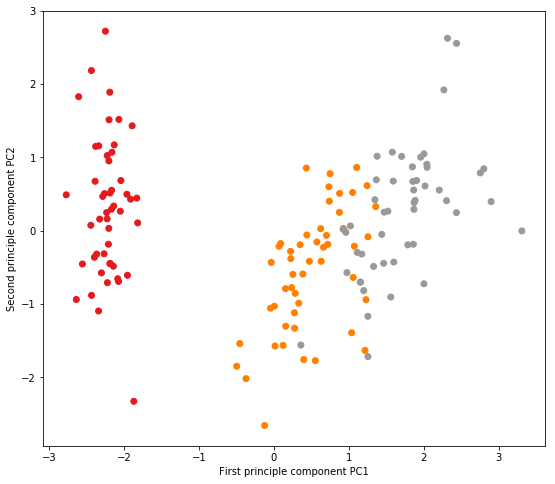

In [78]:
#Code here please
plt.figure(figsize=(9,8))
plt.scatter(x = df_pc['PC1'], y = df_pc['PC2'],c=iris['target'],cmap = 'Set1')
plt.xlabel('First principle component PC1')
plt.ylabel('Second principle component PC2')

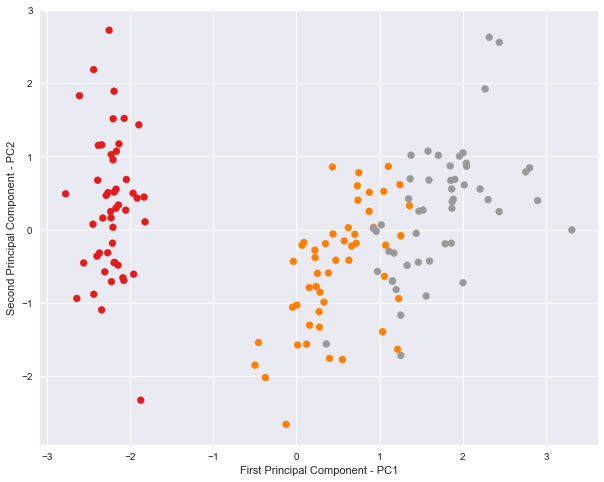

**How to get the components, create a dataframe and output its head.**

In [79]:
#Code here please
pca.components_
df_pca_component = pd.DataFrame(data = pca.components_, columns=iris['feature_names'])
df_pca_component

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416


**Please recreate the plot below.**

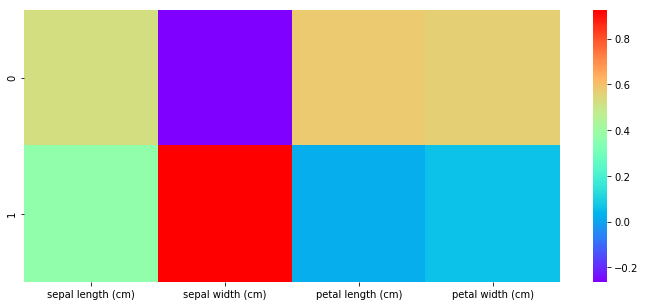

In [80]:
#Code here please
plt.figure(figsize=(12,5))
sns.heatmap(data = df_pca_component,cmap='rainbow')

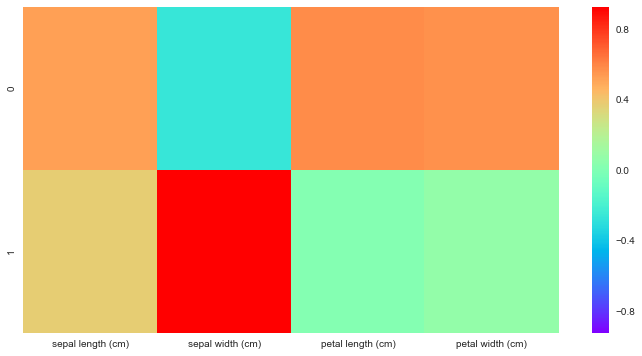

## SVM on Principal Components
**Separate features and target classes and do the train test split** 

In [81]:
#Code here please
X=df_pc
y = iris['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [83]:
#Separating features and target values 
X = df_pc
y = iris['target']
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

**Import SVC create its instance **

In [86]:
#Code here please
from sklearn.svm import SVC
svm_m = SVC(C = 10.0, gamma = 0.1)
svm_m.fit(X_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
from sklearn.grid_search import GridSearchCV

In [51]:
param_grid={'C':[1.0,10.0,100.0,1000.0],
            'gamma':[0.1,0.01,0.001,0.0001]}


In [52]:
svm_grid = GridSearchCV(estimator = SVC(), param_grid=param_grid,verbose=2)

In [53]:
svm_grid.fit(X_train,y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] gamma=0.1, C=1.0 ................................................
[CV] ....................................... gamma=0.1, C=1.0 -   0.0s
[CV] gamma=0.1, C=1.0 ................................................
[CV] ....................................... gamma=0.1, C=1.0 -   0.0s
[CV] gamma=0.1, C=1.0 ................................................
[CV] ....................................... gamma=0.1, C=1.0 -   0.0s
[CV] gamma=0.01, C=1.0 ...............................................
[CV] ...................................... gamma=0.01, C=1.0 -   0.0s
[CV] gamma=0.01, C=1.0 ...............................................
[CV] ...................................... gamma=0.01, C=1.0 -   0.0s
[CV] gamma=0.01, C=1.0 ...............................................
[CV] ...................................... gamma=0.01, C=1.0 -   0.0s
[CV] gamma=0.001, C=1.0 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] gamma=0.0001, C=1000.0 ..........................................
[CV] ................................. gamma=0.0001, C=1000.0 -   0.0s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.1, 0.01, 0.001, 0.0001], 'C': [1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [54]:
svm_grid.best_params_

{'C': 10.0, 'gamma': 0.1}

**Train your model**

In [56]:
#Code here please
svm_m.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
svm_grid.best_params_

{'C': 10.0, 'gamma': 0.1}

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

** Do the predictions please ** 

In [87]:
#Code here please
from sklearn.metrics import confusion_matrix,classification_report

In [88]:
y_perd = svm_m.predict(X_test)

In [62]:
svm_grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] gamma=0.1, C=1.0 ................................................
[CV] ....................................... gamma=0.1, C=1.0 -   0.0s
[CV] gamma=0.1, C=1.0 ................................................
[CV] ....................................... gamma=0.1, C=1.0 -   0.0s
[CV] gamma=0.1, C=1.0 ................................................
[CV] ....................................... gamma=0.1, C=1.0 -   0.0s
[CV] gamma=0.01, C=1.0 ...............................................
[CV] ...................................... gamma=0.01, C=1.0 -   0.0s
[CV] gamma=0.01, C=1.0 ...............................................
[CV] ...................................... gamma=0.01, C=1.0 -   0.0s
[CV] gamma=0.01, C=1.0 ...............................................
[CV] ...................................... gamma=0.01, C=1.0 -   0.0s
[CV] gamma=0.001, C=1.0 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ................................. gamma=0.0001, C=1000.0 -   0.0s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.1, 0.01, 0.001, 0.0001], 'C': [1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [63]:
y_perd2 = svm_grid.predict(X_test)

In [64]:
print(confusion_matrix(y_test,y_perd2))
print(classification_report(y_test,y_perd2))

[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.92      0.85      0.88        13
          2       0.86      0.92      0.89        13

avg / total       0.93      0.93      0.93        45



**Evaluation -- print Classification Report and Confusion Matrix** 

In [89]:
#Code here please
print(confusion_matrix(y_test,y_perd))
print(classification_report(y_test,y_perd))

[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.92      0.85      0.88        13
          2       0.86      0.92      0.89        13

avg / total       0.93      0.93      0.93        45



             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.92      0.85      0.88        13
          2       0.86      0.92      0.89        13

avg / total       0.93      0.93      0.93        45

[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]


# Excellent work!
I hope you enjoyed learning PCA. You have realized how powerful this statistical tool is for higher dimensional data. <br>
The results above could be improved with the GridSearch to find out the best values for C and gamma. 